In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./data/data.csv")
data.head()

,Unnamed: 0,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Country_of_Birth,Income
0,0,3.688879,State-gov,11.258253,Bachelors,1.135322,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,-0.035080,United-States,<=50K
1,1,3.931826,Self-emp-not-inc,11.330348,Bachelors,1.135322,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.227904,United-States,<=50K
2,2,3.663562,Private,12.281398,HS-grad,-0.419772,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035080,United-States,<=50K
3,3,3.988984,Private,12.366157,11th,-1.197318,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035080,United-States,<=50K
4,4,3.367296,Private,12.732013,Bachelors,1.135322,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035080,Cuba,<=50K


In [5]:
final_df_training = pd.read_csv("./data/final_df_training.csv")
final_df_training.head()

,Unnamed: 0,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,...,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Income
0,0,3.688879,11.258253,7.684784,0.0,1.135322,-0.035080,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
1,1,3.931826,11.330348,0.000000,0.0,1.135322,-2.227904,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
2,2,3.663562,12.281398,0.000000,0.0,-0.419772,-0.035080,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
3,3,3.988984,12.366157,0.000000,0.0,-1.197318,-0.035080,0,0,0,...,0,0,0,0,1,0,0,0,1,-1.0
4,4,3.367296,12.732013,0.000000,0.0,1.135322,-0.035080,0,0,0,...,0,1,0,0,1,0,0,1,0,-1.0


In [6]:
final_df_prediction = pd.read_csv("./data/final_df_prediction.csv")
final_df_prediction.head()

,Unnamed: 0,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,...,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Income
0,5000,3.871201,11.285121,10.233834,0.000000,1.912869,0.777077,0,0,0,...,0,0,0,0,0,0,1,0,1,NaN
1,5001,4.025352,11.928176,0.000000,7.372118,1.135322,-0.197511,0,0,0,...,0,0,0,0,0,0,1,1,0,NaN
2,5002,3.295837,11.795560,8.519989,0.000000,-0.419772,-0.035080,0,0,0,...,0,1,0,0,0,0,1,1,0,NaN
3,5003,3.367296,11.993343,0.000000,0.000000,-0.419772,-0.035080,0,0,0,...,1,0,0,0,0,0,1,1,0,NaN
4,5004,3.610918,11.040471,0.000000,0.000000,-0.419772,-0.035080,0,0,0,...,0,0,0,0,1,0,0,0,1,NaN


In [7]:
print(len(data))
print(len(final_df_training))
print(len(final_df_prediction))

30000
5000
25000


In [8]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [9]:
def evaluation(test_y:np.ndarray,pred_y:np.ndarray):
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

    print(f"Accuracy Score : {np.round(accuracy_score(test_y,pred_y)*100,2)}%")
    print(f"Recall Score : {np.round(recall_score(test_y,pred_y)*100,2)}%")
    print(f"Precision Score : {np.round(precision_score(test_y,pred_y)*100,2)}%")
    print(f"F1 Score : {np.round(f1_score(test_y,pred_y)*100,2)}%")

    print("\n")

    cm = confusion_matrix(test_y, pred_y)

    print(f"Confusion Matrix : \n{cm}")

    # return accuracy_score(test_y,pred_y)

In [10]:
X = final_df_training.drop(columns=['Unnamed: 0','Income'],axis=1)
y = final_df_training["Income"]

In [11]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101,shuffle=True)
X_pred = final_df_prediction.drop(columns=['Unnamed: 0','Income'],axis=1)

In [12]:
X_train[0:5]

,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,Employment_Type_ Private,...,Partnership_ Own-child,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male
3413,3.555348,12.739465,8.895493,0.0,1.135322,1.589234,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1610,4.077537,12.262207,0.000000,0.0,-0.808545,0.939509,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3459,3.091042,12.784855,0.000000,0.0,-0.419772,-0.035080,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4293,3.526361,12.238119,0.000000,0.0,-0.030998,-0.035080,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1039,3.555348,12.009510,0.000000,0.0,-1.197318,-2.633982,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [14]:
LR.fit(X_train,y_train)

c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = LR.predict(X_test)
evaluation(y_test,y_pred)

Accuracy Score : 84.4%
Recall Score : 55.51%
Precision Score : 74.32%
F1 Score : 63.55%


Confusion Matrix : 
[[708  47]
 [109 136]]


In [16]:
y_pred_wo_income = LR.predict(X_pred)

Income
 <=50K    20075
 >50K      4925
dtype: int64


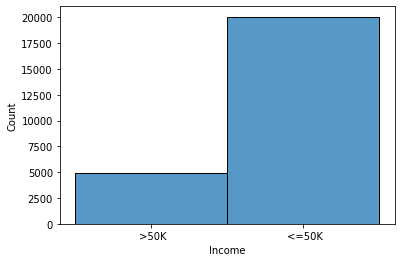

In [17]:
print(pd.DataFrame(y_pred_wo_income,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning the LR model

In [18]:
import warnings

In [20]:
clf_LR = LogisticRegression()
params_LR = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'saga'],
    'max_iter': [100,200,300,500]
    # 'multi_class': ['auto', 'ovr', 'multinomial']
}

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Fit the classifier
    
    grid_search_LR = GridSearchCV(clf_LR,params_LR);
    grid_search_LR.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_LR.best_params_)
print("Best Score:", grid_search_LR.best_score_)

best_model_LR = grid_search_LR.best_estimator_

y_pred_LR2 = best_model_LR.predict(X_test)
evaluation(y_test,y_pred_LR2)

Best Hyperparameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.842
Accuracy Score : 84.1%
Recall Score : 55.51%
Precision Score : 73.12%
F1 Score : 63.11%


Confusion Matrix : 
[[705  50]
 [109 136]]


In [21]:
LR2 = LogisticRegression(penalty="l2",solver="saga",max_iter=500)
LR2.fit(X_train,y_train)
y_pred_LR2 = LR2.predict(X_test)
evaluation(y_test,y_pred_LR2)

Accuracy Score : 84.4%
Recall Score : 55.1%
Precision Score : 74.59%
F1 Score : 63.38%


Confusion Matrix : 
[[709  46]
 [110 135]]


c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Decision Trees


In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

y_pred_DT = DT.predict(X_test)
evaluation(y_test,y_pred_DT)

Accuracy Score : 80.7%
Recall Score : 59.59%
Precision Score : 60.83%
F1 Score : 60.21%


Confusion Matrix : 
[[661  94]
 [ 99 146]]


Income
 <=50K    18976
 >50K      6024
dtype: int64


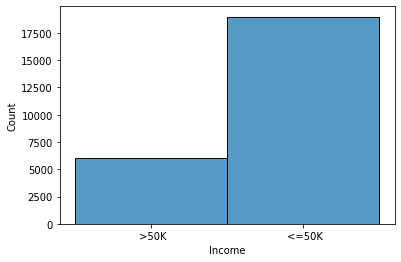

In [23]:
y_pred_wo_income_DT = DT.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning the DT model

In [24]:
clf_DT = DecisionTreeClassifier()

params_DT = {
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2','auto'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_search_DT = GridSearchCV(clf_DT,params_DT);
grid_search_DT.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_DT.best_params_)
print("Best Score:", grid_search_DT.best_score_)

best_model_DT = grid_search_DT.best_estimator_

y_pred_DT2 = best_model_DT.predict(X_test)
evaluation(y_test,y_pred_DT2)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 0.843
Accuracy Score : 84.2%
Recall Score : 52.24%
Precision Score : 75.74%
F1 Score : 61.84%


Confusion Matrix : 
[[714  41]
 [117 128]]


Income
 <=50K    18976
 >50K      6024
dtype: int64


Income
 <=50K    20828
 >50K      4172
dtype: int64


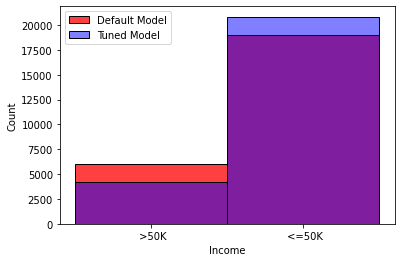

In [25]:
y_pred_wo_income_DT2 = best_model_DT.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

In [26]:
# tuned_model = DecisionTreeClassifier(max_depth=7,min_samples_split=2,min_samples_leaf=2,max_features=None,criterion='gini')
# tuned_model.fit(X_train,y_train)
# evaulation(y_test,tuned_model.predict(X_test))

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)
evaluation(y_test,y_pred_RF)

Accuracy Score : 83.4%
Recall Score : 57.14%
Precision Score : 69.65%
F1 Score : 62.78%


Confusion Matrix : 
[[694  61]
 [105 140]]


Income
 <=50K    19929
 >50K      5071
dtype: int64


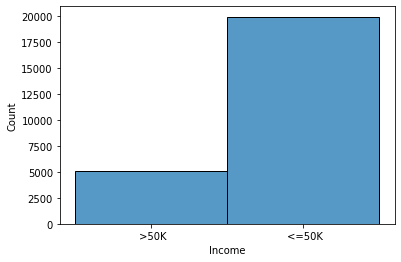

In [28]:
y_pred_wo_income_RF = RF.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning RandomForest

In [29]:
clf_RF = RandomForestClassifier()
params_RF = {
    'n_estimators': [50,100,300],
    'criterion': ["gini","entropy"],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_RF = GridSearchCV(clf_RF,params_RF)
grid_search_RF.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_RF.best_params_)
print("Best Score:", grid_search_RF.best_score_)

best_model_RF = grid_search_RF.best_estimator_

y_pred_RF2 = best_model_RF.predict(X_test)
evaluation(y_test,y_pred_RF2)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.85375
Accuracy Score : 85.5%
Recall Score : 58.37%
Precision Score : 76.88%
F1 Score : 66.36%


Confusion Matrix : 
[[712  43]
 [102 143]]


Income
 <=50K    19929
 >50K      5071
dtype: int64


Income
 <=50K    20371
 >50K      4629
dtype: int64


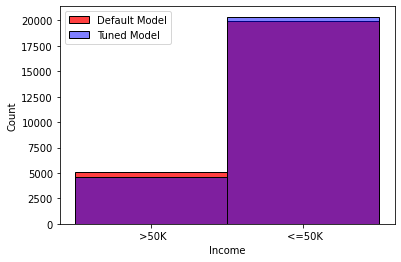

In [30]:
y_pred_wo_income_RF2 = best_model_RF.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_RF2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_RF2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# SVM

In [31]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train,y_train)

y_pred_SVM = SVM.predict(X_test)
evaluation(y_test,y_pred_SVM)

Accuracy Score : 83.5%
Recall Score : 48.57%
Precision Score : 75.32%
F1 Score : 59.06%


Confusion Matrix : 
[[716  39]
 [126 119]]


Income
 <=50K    20711
 >50K      4289
dtype: int64


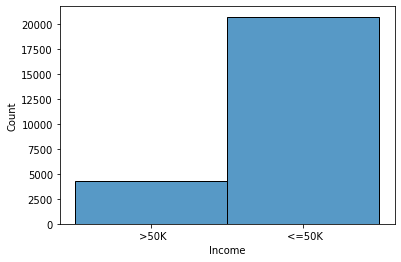

In [32]:
y_pred_wo_income_SVM = SVM.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_SVM,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_SVM,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning Support-Vector-Machine

In [33]:
clf_SVM = SVC()
params_SVM = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1,1,2,4],
    'gamma': ['scale','auto'],
}

grid_search_SVM = GridSearchCV(clf_SVM, params_SVM)
grid_search_SVM.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_SVM.best_params_)
print("Best Score:", grid_search_SVM.best_score_)

best_model_SVM = grid_search_SVM.best_estimator_

y_pred_SVM2 = best_model_SVM.predict(X_test)
evaluation(y_test,y_pred_SVM2)

Best Hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best Score: 0.84375
Accuracy Score : 84.4%
Recall Score : 54.29%
Precision Score : 75.14%
F1 Score : 63.03%


Confusion Matrix : 
[[711  44]
 [112 133]]


Income
 <=50K    20711
 >50K      4289
dtype: int64


Income
 <=50K    20415
 >50K      4585
dtype: int64


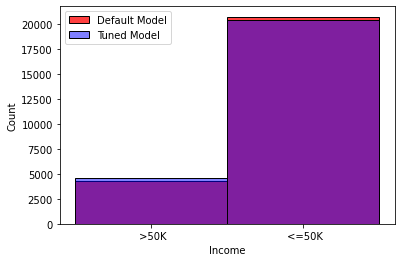

In [34]:
y_pred_wo_income_SVM2 = best_model_SVM.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_SVM,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_SVM2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_SVM,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_SVM2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# k-Nearest Neighbors (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

k = 2  # Specify the number of neighbors
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(X_train,y_train)

y_pred_KNN = KNN.predict(X_test)
evaluation(y_test,y_pred_KNN)

Accuracy Score : 80.4%
Recall Score : 39.59%
Precision Score : 66.9%
F1 Score : 49.74%


Confusion Matrix : 
[[707  48]
 [148  97]]


Income
 <=50K    21153
 >50K      3847
dtype: int64


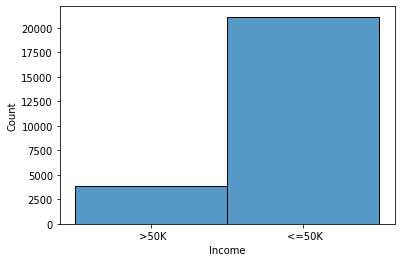

In [205]:
y_pred_wo_income_KNN = KNN.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning K-Nearest Neighbour

In [210]:
clf_KNN = KNeighborsClassifier()
params_KNN = {
    'n_neighbors': [5,15,25,40,60],
    # 'weights': ['uniform', 'distance'],
    'leaf_size': [3,4,5,7,10,20,100],
    # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_KNN = GridSearchCV(clf_KNN, params_KNN)
grid_search_KNN.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_KNN.best_params_)
print("Best Score:", grid_search_KNN.best_score_)

best_model_KNN = grid_search_KNN.best_estimator_

y_pred_KNN2 = best_model_KNN.predict(X_test)
evaluation(y_test,y_pred_KNN2)

Best Hyperparameters: {'leaf_size': 3, 'n_neighbors': 40}
Best Score: 0.8332499999999999
Accuracy Score : 83.7%
Recall Score : 51.84%
Precision Score : 73.84%
F1 Score : 60.91%


Confusion Matrix : 
[[710  45]
 [118 127]]


Income
 <=50K    21153
 >50K      3847
dtype: int64


Income
 <=50K    20199
 >50K      4801
dtype: int64


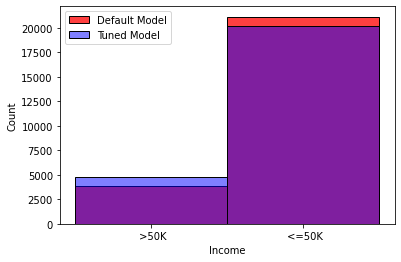

In [211]:
y_pred_wo_income_KNN2 = best_model_KNN.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_KNN2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_KNN2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# Naive Bayes?

# Neural Network

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense
import tensorflow as tf
from keras.layers.core import Activation
from sklearn.preprocessing import LabelEncoder

In [69]:
X_train.head()

,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,Employment_Type_ Private,...,Partnership_ Own-child,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male
3413,3.555348,12.739465,8.895493,0.0,1.135322,1.589234,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1610,4.077537,12.262207,0.000000,0.0,-0.808545,0.939509,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3459,3.091042,12.784855,0.000000,0.0,-0.419772,-0.035080,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4293,3.526361,12.238119,0.000000,0.0,-0.030998,-0.035080,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1039,3.555348,12.009510,0.000000,0.0,-1.197318,-2.633982,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [70]:
y_train.head()

3413    1.0
1610   -1.0
3459   -1.0
4293   -1.0
1039   -1.0
Name: Income, dtype: float64

In [71]:
X_train_nn = X_train.to_numpy()
y_train_nn = tf.keras.utils.to_categorical(y_train.replace({-1:2,1:1}))

In [72]:
X_train_nn[0:5]

array([[ 3.55534806, 12.73946472,  8.89549263,  0.        ,  1.13532183,
         1.5892344 ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ],
       [ 4.07753744, 12.2622072 ,  0.        ,  0.        , -0.

In [74]:
y_train_nn[0:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [75]:
print(X_train_nn.shape)
print(y_train_nn.shape)

(4000, 64)
(4000, 3)


In [79]:
model = Sequential()

model.add(tf.keras.Input(X_train_nn.shape[1]))
model.add(Dense(128,activation='relu',input_shape = (64,)))
model.add(Dense(64,activation='relu',input_shape = (128,)))
model.add(Dense(3,activation="sigmoid",input_shape = (64,)))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [80]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 3)                 195       
                                                                 
Total params: 16,771
Trainable params: 16,771
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train_nn,y_train_nn,epochs=30,batch_size=4)

Epoch 1/30


1000/1000 [==============================] - 2s 2ms/step - loss: 0.2515 - categorical_accuracy: 0.8185
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2276 - categorical_accuracy: 0.8342
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2230 - categorical_accuracy: 0.8425
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2183 - categorical_accuracy: 0.8455
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2140 - categorical_accuracy: 0.8465
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2096 - categorical_accuracy: 0.8515
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2054 - categorical_accuracy: 0.8540
Epoch 8/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2035 - categorical_accuracy: 0.8525
Epoch 9/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1988 - categorical_ac

In [82]:
from sklearn.metrics import classification_report

In [86]:
X_test.head()

,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,Employment_Type_ Private,...,Partnership_ Own-child,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male
1718,3.583519,10.321606,0.0,0.0,1.135322,0.370999,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2511,4.262680,12.477420,0.0,0.0,-0.030998,-2.796414,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
345,3.784190,12.396263,0.0,0.0,1.135322,0.127352,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2521,4.007333,12.042294,0.0,0.0,1.524095,-0.035080,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
54,3.871201,11.606716,0.0,0.0,-0.419772,1.589234,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [88]:
y_test.head()

1718    1.0
2511   -1.0
345    -1.0
2521   -1.0
54     -1.0
Name: Income, dtype: float64

In [89]:
y_test_nn = y_test.replace({-1:2,1:1}).to_numpy()
y_test_nn[0:5]

array([1., 2., 2., 2., 2.])

In [90]:
prediction = model.predict(X_test.to_numpy())
print(classification_report(y_test_nn,np.argmax(prediction,axis=1)))

              precision    recall  f1-score   support

         1.0       0.64      0.56      0.60       245
         2.0       0.86      0.90      0.88       755

    accuracy                           0.81      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.81      0.81      0.81      1000



In [148]:
predict_incomes = model.predict(X_pred)
predict_incomes

array([[0.00000000e+00, 1.00000000e+00, 2.63006434e-08],
       [0.00000000e+00, 1.36226416e-04, 9.99882460e-01],
       [2.59336713e-15, 9.72018719e-01, 2.86515355e-02],
       ...,
       [1.19514602e-15, 6.34408295e-02, 9.39150453e-01],
       [2.27122438e-17, 1.52870715e-02, 9.82439756e-01],
       [2.38570708e-11, 1.07167959e-01, 8.66585732e-01]], dtype=float32)

 <=50K    19619
 >50K      5381
dtype: int64


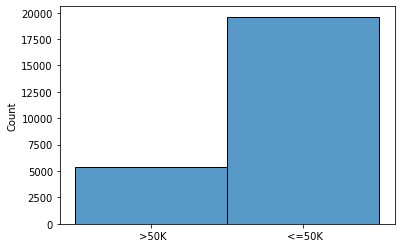

In [200]:
sns.histplot(pd.Series(np.argmax(predict_incomes,axis=1)).replace({1:" >50K",2: " <=50K"}));
print(pd.Series(np.argmax(predict_incomes,axis=1)).replace({1:" >50K",2: " <=50K"}).value_counts())

---

In [178]:
# data = pd.read_csv("./data/data.csv")
# data = data.drop(columns=["Unnamed: 0"])
# data.head()
data = pd.read_csv("data/einkommen.train",delimiter=",",header=None)
data.columns = ["Age","Employment_Type","Weighing_Factor","Education_Level","Schooling","Marital_Status","Employment_Area","Partnership","Ethnicity","Gender","Gains_FA","Loss_FA","Working_Time","Country_of_Birth","Income"]
data = data.drop(columns = ["Weighing_Factor","Gains_FA","Loss_FA","Ethnicity","Country_of_Birth"])
data.head()

,Age,Employment_Type,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Gender,Working_Time,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,<=50K


In [179]:
X = data.drop(columns=["Income"])
X.fillna("Missing",inplace=True)
y = data[["Income"]]

In [180]:
label_encoding = {}
for index, str_column in enumerate([column for column in X.columns.tolist() if X[column].dtypes == "O"]):
    globals()[f"LE_{index}"] = LabelEncoder()
    X[str_column] = globals()[f"LE_{index}"].fit_transform(X[str_column].tolist())
    label_encoding[str_column] = globals()[f"LE_{index}"] 

In [181]:
label_encoding

{'Employment_Type': LabelEncoder(),
 'Education_Level': LabelEncoder(),
 'Marital_Status': LabelEncoder(),
 'Employment_Area': LabelEncoder(),
 'Partnership': LabelEncoder(),
 'Gender': LabelEncoder()}

In [182]:
X_nn = X.to_numpy()
X_nn_norm = X_nn/np.linalg.norm(X_nn,axis=0)
X_nn_norm[0:5]

array([[0.00550192, 0.00977187, 0.00472223, 0.00721497, 0.00765462,
        0.0007389 , 0.00267103, 0.00705873, 0.00546407],
       [0.00705375, 0.00837589, 0.00472223, 0.00721497, 0.00382731,
        0.0029556 , 0.        , 0.00705873, 0.00177582],
       [0.00536085, 0.00558392, 0.00577161, 0.00499498, 0.        ,
        0.00443339, 0.00267103, 0.00705873, 0.00546407],
       [0.00747697, 0.00558392, 0.00052469, 0.00388498, 0.00382731,
        0.00443339, 0.        , 0.00705873, 0.00546407],
       [0.0039501 , 0.00558392, 0.00472223, 0.00721497, 0.00382731,
        0.00738899, 0.01335515, 0.        , 0.00546407]])

In [183]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_nn_ss = ss.fit_transform(X_nn)
X_nn_ss[0:5]

array([[ 0.03059408,  2.15127053, -0.3368399 ,  1.13532183,  0.91970621,
        -1.31668895, -0.27816917,  0.70339769, -0.03507977],
       [ 0.83660133,  1.46358282, -0.3368399 ,  1.13532183, -0.40656996,
        -0.60747407, -0.90084303,  0.70339769, -2.22790391],
       [-0.04267931,  0.08820741,  0.18051307, -0.41977154, -1.73284612,
        -0.13466415, -0.27816917,  0.70339769, -0.03507977],
       [ 1.05642149,  0.08820741, -2.40625178, -1.19731822, -0.40656996,
        -0.13466415, -0.90084303,  0.70339769, -0.03507977],
       [-0.77541317,  0.08820741, -0.3368399 ,  1.13532183, -0.40656996,
         0.81095569,  2.21252627, -1.42167086, -0.03507977]])

In [184]:
print(X_nn_norm.shape)
print(X_nn_ss.shape)

(30000, 9)
(30000, 9)


In [185]:
%%capture
training_X = X_nn[:5000]
training_y = y[:5000]
prediction_data = X_nn[5000:]

training_X_norm = X_nn_norm[:5000]
prediction_data_norm = X_nn_ss[5000:]

training_X_ss = X_nn_ss[:5000]
prediction_data_ss = X_nn_ss[5000:]

In [186]:
training_y["Income"]

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
4995     <=50K
4996      >50K
4997      >50K
4998     <=50K
4999     <=50K
Name: Income, Length: 5000, dtype: object

In [187]:
label_encoding_income = LabelEncoder()
training_y['Income'] = label_encoding_income.fit_transform(training_y['Income'].tolist())

C:\Users\kshit\AppData\Local\Temp\ipykernel_4968\3514253416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_y['Income'] = label_encoding_income.fit_transform(training_y['Income'].tolist())


In [188]:
label_encoding_income.classes_

array([' <=50K', ' >50K'], dtype='<U6')

In [125]:
y_nn = training_y.to_numpy()

In [126]:
X_nn.shape

(30000, 9)

In [127]:
y_nn.shape

(5000, 1)

In [130]:
print(training_X.shape)
print(training_X_norm.shape)
print(training_X_ss.shape)

(5000, 9)
(5000, 9)
(5000, 9)


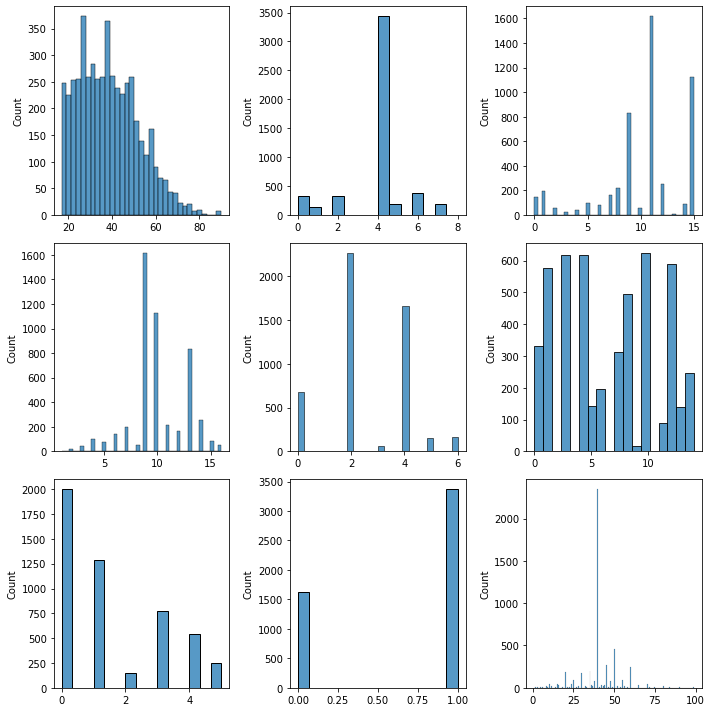

In [131]:
fig,axes = plt.subplots(3,3,figsize=(10,10))
sns.histplot(data=training_X[:,0], ax = axes[0,0])
sns.histplot(data=training_X[:,1], ax = axes[0,1])
sns.histplot(data=training_X[:,2], ax = axes[0,2])
sns.histplot(data=training_X[:,3], ax = axes[1,0])
sns.histplot(data=training_X[:,4], ax = axes[1,1])
sns.histplot(data=training_X[:,5], ax = axes[1,2])
sns.histplot(data=training_X[:,6], ax = axes[2,0])
sns.histplot(data=training_X[:,7], ax = axes[2,1])
sns.histplot(data=training_X[:,8], ax = axes[2,2])
plt.tight_layout()

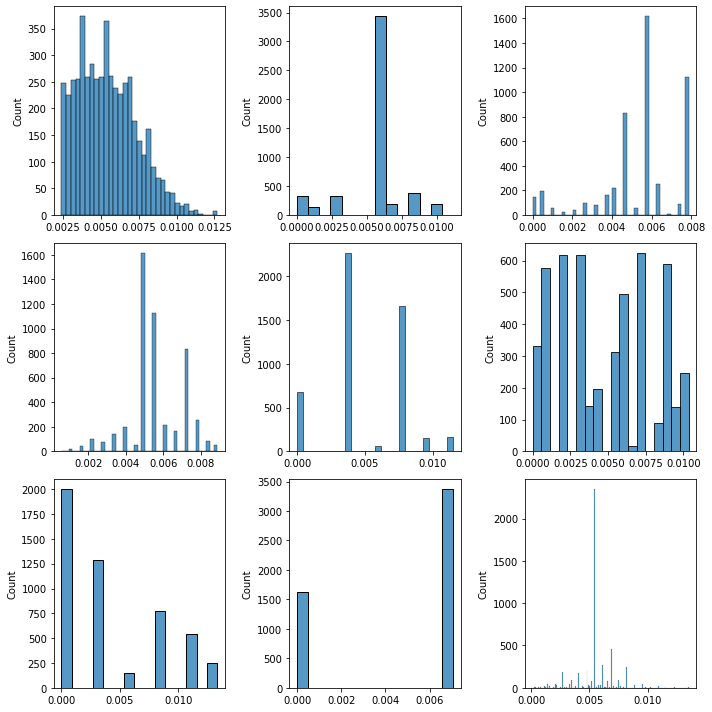

In [132]:
fig,axes = plt.subplots(3,3,figsize=(10,10))
sns.histplot(data=training_X_norm[:,0], ax = axes[0,0])
sns.histplot(data=training_X_norm[:,1], ax = axes[0,1])
sns.histplot(data=training_X_norm[:,2], ax = axes[0,2])
sns.histplot(data=training_X_norm[:,3], ax = axes[1,0])
sns.histplot(data=training_X_norm[:,4], ax = axes[1,1])
sns.histplot(data=training_X_norm[:,5], ax = axes[1,2])
sns.histplot(data=training_X_norm[:,6], ax = axes[2,0])
sns.histplot(data=training_X_norm[:,7], ax = axes[2,1])
sns.histplot(data=training_X_norm[:,8], ax = axes[2,2])
plt.tight_layout()

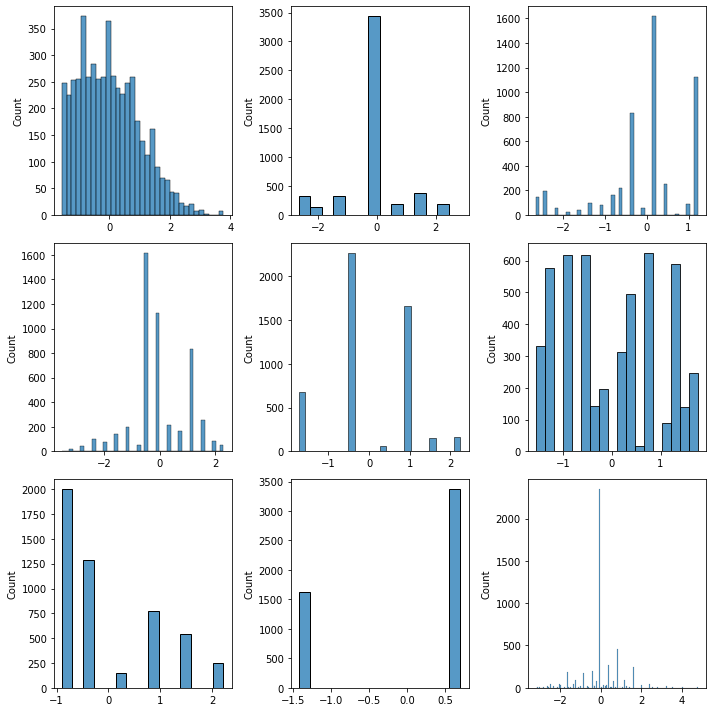

In [133]:
fig,axes = plt.subplots(3,3,figsize=(10,10))
sns.histplot(data=training_X_ss[:,0], ax = axes[0,0])
sns.histplot(data=training_X_ss[:,1], ax = axes[0,1])
sns.histplot(data=training_X_ss[:,2], ax = axes[0,2])
sns.histplot(data=training_X_ss[:,3], ax = axes[1,0])
sns.histplot(data=training_X_ss[:,4], ax = axes[1,1])
sns.histplot(data=training_X_ss[:,5], ax = axes[1,2])
sns.histplot(data=training_X_ss[:,6], ax = axes[2,0])
sns.histplot(data=training_X_ss[:,7], ax = axes[2,1])
sns.histplot(data=training_X_ss[:,8], ax = axes[2,2])
plt.tight_layout()

In [134]:
from sklearn.model_selection import train_test_split

X_train_nn,X_test_nn,y_train_nn,y_test_nn = train_test_split(training_X,y_nn,shuffle=True,random_state=42,test_size=0.1)
X_train_nn_norm,X_test_nn_norm,y_train_nn_norm,y_test_nn_norm = train_test_split(training_X_norm,y_nn,shuffle=True,random_state=42,test_size=0.1)
X_train_nn_ss,X_test_nn_ss,y_train_nn_ss,y_test_nn_ss = train_test_split(training_X_ss,y_nn,shuffle=True,random_state=42,test_size=0.1)

In [135]:
print(X_train_nn.shape)
print(X_train_nn_norm.shape)
print(X_train_nn_ss.shape)

(4500, 9)
(4500, 9)
(4500, 9)


In [136]:
print(y_train_nn.shape)
print(y_train_nn_norm.shape)
print(y_train_nn_ss.shape)

(4500, 1)
(4500, 1)
(4500, 1)


In [137]:
model_base = Sequential()

model_base.add(tf.keras.Input(X_train_nn.shape[1]))
model_base.add(Dense(64,activation='relu',input_shape = (9,)))
model_base.add(Dense(16,activation='relu',input_shape = (128,)))
model_base.add(Dense(1,activation="sigmoid",input_shape = (64,)))

model_base.compile(optimizer="adam",loss="binary_crossentropy",metrics=[tf.keras.metrics.CategoricalAccuracy()])

model_norm = Sequential()

model_norm.add(tf.keras.Input(X_train_nn_norm.shape[1]))
model_norm.add(Dense(64,activation='relu',input_shape = (9,)))
model_norm.add(Dense(16,activation='relu',input_shape = (128,)))
model_norm.add(Dense(1,activation="sigmoid",input_shape = (64,)))

model_norm.compile(optimizer="adam",loss="binary_crossentropy",metrics=[tf.keras.metrics.CategoricalAccuracy()])

model_ss = Sequential()

model_ss.add(tf.keras.Input(X_train_nn_ss.shape[1]))
model_ss.add(Dense(64,activation='relu',input_shape = (9,)))
model_ss.add(Dense(16,activation='relu',input_shape = (128,)))
model_ss.add(Dense(1,activation="sigmoid",input_shape = (64,)))

model_ss.compile(optimizer="adam",loss="binary_crossentropy",metrics=[tf.keras.metrics.CategoricalAccuracy()])

# weights = class_weight.compute_class_weight(class_weight="balanced", classes=list(np.unique(y_train_nn)), y=y_train_nn)

In [138]:
model_base.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                640       
                                                                 
 dense_25 (Dense)            (None, 16)                1040      
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


In [139]:
model_norm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                640       
                                                                 
 dense_28 (Dense)            (None, 16)                1040      
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


In [140]:
model_ss.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                640       
                                                                 
 dense_31 (Dense)            (None, 16)                1040      
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


In [141]:
np.unique(y_train_nn)

array([0, 1], dtype=int64)

In [142]:
model_base.fit(X_train_nn,y_train_nn,epochs=30,batch_size=4)

Epoch 1/30


1125/1125 [==============================] - 2s 2ms/step - loss: 0.5157 - categorical_accuracy: 1.0000
Epoch 2/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4878 - categorical_accuracy: 1.0000
Epoch 3/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4691 - categorical_accuracy: 1.0000
Epoch 4/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4388 - categorical_accuracy: 1.0000
Epoch 5/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4198 - categorical_accuracy: 1.0000
Epoch 6/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4056 - categorical_accuracy: 1.0000
Epoch 7/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3988 - categorical_accuracy: 1.0000
Epoch 8/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3997 - categorical_accuracy: 1.0000
Epoch 9/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3951 - categorical_ac

In [143]:
model_norm.fit(X_train_nn_norm,y_train_nn_norm,epochs=30,batch_size=4)

Epoch 1/30


1125/1125 [==============================] - 3s 1ms/step - loss: 0.5605 - categorical_accuracy: 1.0000
Epoch 2/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5484 - categorical_accuracy: 1.0000
Epoch 3/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.5413 - categorical_accuracy: 1.0000
Epoch 4/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.5292 - categorical_accuracy: 1.0000
Epoch 5/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5096 - categorical_accuracy: 1.0000
Epoch 6/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4946 - categorical_accuracy: 1.0000
Epoch 7/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4854 - categorical_accuracy: 1.0000
Epoch 8/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4818 - categorical_accuracy: 1.0000
Epoch 9/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.4798 - categorical_ac

In [144]:
model_ss.fit(X_train_nn_ss,y_train_nn_ss,epochs=30,batch_size=4)

Epoch 1/30


1125/1125 [==============================] - 3s 2ms/step - loss: 0.4025 - categorical_accuracy: 1.0000
Epoch 2/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3660 - categorical_accuracy: 1.0000
Epoch 3/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.3603 - categorical_accuracy: 1.0000
Epoch 4/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3542 - categorical_accuracy: 1.0000
Epoch 5/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3533 - categorical_accuracy: 1.0000
Epoch 6/30
1125/1125 [==============================] - 2s 1ms/step - loss: 0.3503 - categorical_accuracy: 1.0000
Epoch 7/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3473 - categorical_accuracy: 1.0000
Epoch 8/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3462 - categorical_accuracy: 1.0000
Epoch 9/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3433 - categorical_ac

In [205]:
prediction = model_base.predict(X_test_nn)
print(classification_report(y_test_nn,np.round(prediction)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       369
           1       0.69      0.63      0.66       131

    accuracy                           0.83       500
   macro avg       0.78      0.77      0.77       500
weighted avg       0.83      0.83      0.83       500



 <=50K    20073
 >50K      4927
dtype: int64


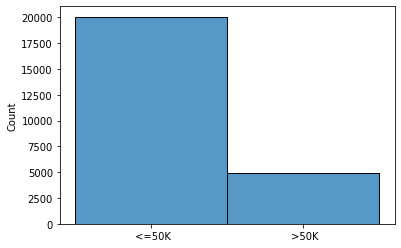

In [209]:
predicted_base = model_base.predict(prediction_data)
sns.histplot(label_encoding_income.inverse_transform(np.round(predicted_base.reshape(predicted_base.shape[0])).astype(np.int64)))
print(pd.Series(label_encoding_income.inverse_transform(np.round(predicted_base.reshape(predicted_base.shape[0])).astype(np.int64))).value_counts())

In [210]:
prediction = model_norm.predict(X_test_nn_norm)
print(classification_report(y_test_nn_norm,np.round(prediction)))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       369
           1       0.63      0.18      0.28       131

    accuracy                           0.76       500
   macro avg       0.70      0.57      0.57       500
weighted avg       0.73      0.76      0.70       500



 <=50K    14283
 >50K     10717
dtype: int64


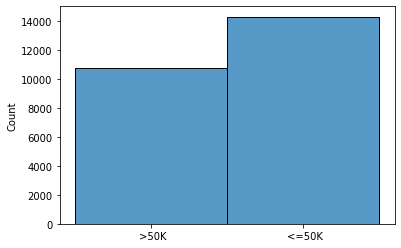

In [211]:
predicted_norm = model_norm.predict(prediction_data_norm)
sns.histplot(label_encoding_income.inverse_transform(np.round(predicted_norm.reshape(predicted_norm.shape[0])).astype(np.int64)))
print(pd.Series(label_encoding_income.inverse_transform(np.round(predicted_norm.reshape(predicted_norm.shape[0])).astype(np.int64))).value_counts())

In [212]:
prediction = model_ss.predict(X_test_nn_ss)
print(classification_report(y_test_nn_ss,np.round(prediction)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       369
           1       0.62      0.69      0.65       131

    accuracy                           0.81       500
   macro avg       0.75      0.77      0.76       500
weighted avg       0.81      0.81      0.81       500



 <=50K    18526
 >50K      6474
dtype: int64


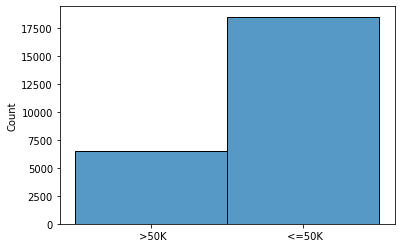

In [213]:
predicted_ss = model_ss.predict(prediction_data_ss)
sns.histplot(label_encoding_income.inverse_transform(np.round(predicted_ss.reshape(predicted_ss.shape[0])).astype(np.int64)))
print(pd.Series(label_encoding_income.inverse_transform(np.round(predicted_ss.reshape(predicted_ss.shape[0])).astype(np.int64))).value_counts())